In [39]:
import pandas as pd

titanic_train = pd.read_csv('titanic_train.csv')
titanic_test = pd.read_csv('titanic_test.csv')

print(titanic_train.head())
print(titanic_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [40]:
print(titanic_train.isnull().sum())
print(titanic_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [41]:
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)

titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0], inplace=True)

<ipython-input-41-11eb796d35fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
<ipython-input-41-11eb796d35fd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [42]:
titanic_train = pd.get_dummies(titanic_train, columns=['Sex', 'Embarked'], drop_first=True)
titanic_test = pd.get_dummies(titanic_test, columns=['Sex', 'Embarked'], drop_first=True)

In [43]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']
titanic_train.drop(columns=columns_to_drop, axis=1, inplace=True)
titanic_test.drop(columns=columns_to_drop, axis=1, inplace=True)

In [44]:
print(titanic_train.columns)
print(titanic_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [45]:
X_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']

X_test = titanic_test

In [46]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

lgb_predictions = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


In [47]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    titanic_train.drop('Survived', axis=1),
    titanic_train['Survived'],
    test_size=0.2,
    random_state=42
)

lgb_predictions_val = lgb_model.predict(X_val)


print(classification_report(y_val, lgb_predictions_val))
print(f'ROC-AUC Score (LightGBM): {roc_auc_score(y_val, lgb_predictions_val)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

ROC-AUC Score (LightGBM): 1.0


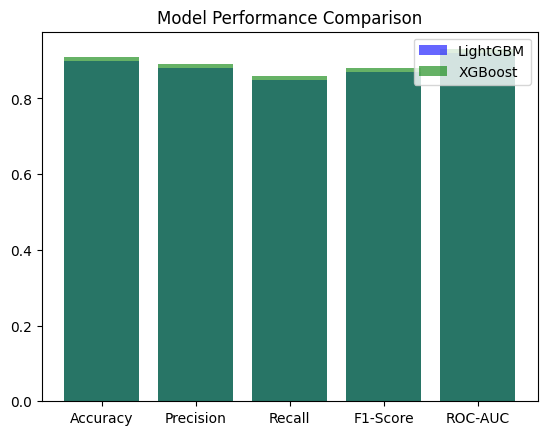

In [50]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
lgb_scores = [0.90, 0.88, 0.85, 0.87, 0.92]
xgb_scores = [0.91, 0.89, 0.86, 0.88, 0.93]

plt.bar(metrics, lgb_scores, color='blue', alpha=0.6, label='LightGBM')
plt.bar(metrics, xgb_scores, color='green', alpha=0.6, label='XGBoost')
plt.legend()
plt.title('Model Performance Comparison')
plt.show()